In [2]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt

In [3]:
def pickle_file(obj, path):
    file = open(path, 'wb')
    pickle.dump(obj, file)
    file.close()

def load_pickle(path):
    file = open(path, 'rb')
    obj = pickle.load(file)
    file.close()
    return obj

In [4]:
def genrate_dates(df):
    df['DATE'] = pd.to_datetime(df.DATE)
    # df['WEEK'] = df.DATE.dt.weekofyear
    # df['YEAR'] = df.DATE.dt.year

def remove_duplicates(df):
    # Get rid of the duplicate entry
    print(df.shape)
    df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                            inplace=True, ascending=False)
    df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)
    print(df.shape)
def shift_drop(df):
    # #Shift Rows and Drop NA
    df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df
                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES", "EXITS"]
                                    .apply(lambda grp: grp.shift(1)))
    df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

def tally_entrances(df, max_counter = 5000):
    df['DAILY_ENTRIES'] = (df.ENTRIES - df.PREV_ENTRIES).abs()
    df['DAILY_EXITS'] = (df.EXITS - df.PREV_EXITS).abs()
    
    for x in ['ENTRIES', 'EXITS']:
        df['OVER_MAX'] = df['DAILY_'+x] > max_counter
        print(df.OVER_MAX.sum())

        
        df['DAILY_'+x] = (df['DAILY_'+x] * ~ df.OVER_MAX) + (df[[x,'PREV_'+x]].min(axis=1) * df.OVER_MAX)

        df['OVER_MAX'] = df['DAILY_'+x] > max_counter
        print(df.OVER_MAX.sum())

        df['DAILY_'+x] = (df['DAILY_'+x] * ~ df.OVER_MAX) + ((df['DAILY_'+x]* ~df.OVER_MAX).mean() * df.OVER_MAX)
        df['OVER_MAX'] = df['DAILY_'+x] > max_counter
        print(df.OVER_MAX.sum())
    df.drop('OVER_MAX', axis=1, inplace=True)

def generate_line_density(df):
    df['LINE_DENSITY'] = (df.DAILY_ENTRIES + df.DAILY_EXITS) / df.LINENAME.str.len()

# def generate_7_day_totals(df):
#     weekly_columns = ['WEEKLY_ENTRIES','WEEKLY_EXITS', 'WEEKLY_LINE_DENSITY'] 
#     df[weekly_columns] = df[['DAILY_ENTRIES','DAILY_EXITS', 'LINE_DENSITY']]
#     df[weekly_columns]  = df.groupby(['WEEK', 'YEAR', "C/A", "UNIT", "SCP", "STATION"]).mean()[weekly_columns]
    
    # for i in range(-3,4):
    #     df['WEEKLY_ENTRIES'] = df['WEEKLY_ENTRIES'] + df.DAILY_ENTRIES.shift(i).fillna(0)
    # # df['WEEKLY_ENTRIES'] = df['WEEKLY_ENTRIES']/7
    # df['MASK'] = df.WEEKLY_ENTRIES.isna()
    # df.WEEKLY_ENTRIES.fillna(0, inplace=True)
    # df['WEEKLY_ENTRIES'] = (df.WEEKLY_ENTRIES * ~df.MASK) + (df.WEEKLY_ENTRIES.mean() * df.MASK)
    # # df['WEEKLY_ENTRIES'].iloc[:3] = df['WEEKLY_ENTRIES'].mean()
    # # df['WEEKLY_ENTRIES'].iloc[-3:] = df['WEEKLY_ENTRIES'].mean()
    # df = df.reset_index()

# def group_by_date(df):
#     df = df[['STATION', 'LINENAME', 'DATE',
#        'DAILY_ENTRIES', 'DAILY_EXITS', 'LINE_DENSITY']].groupby(['DATE','STATION', 'LINENAME']).sum()

In [4]:
path = './mta_data_raw/'
df_list = []

for filename in os.listdir(path):
    if 'mta_stations_' in filename:

        df = load_pickle(path+filename)
        genrate_dates(df)
        print('Data Loaded')
        
        remove_duplicates(df)
        shift_drop(df)
        tally_entrances(df)
        generate_line_density(df)
        # generate_7_day_totals(df)
        # group_by_date(df)

        pickle_file(df, f"mta_data_cleaned/{filename}")
        print(f"saved:\tmta_data_cleaned/{filename}\n")
        print('-_'*10)
        print('\n')

print('\n\n\n'+ '-_'*10)
print('All Done')

Data Loaded
(1437956, 11)
(1437917, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


112
38
0
96
18
0
saved:	mta_data_cleaned/mta_stations_30_40

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(922772, 11)
(922758, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


103
33
0
87
21
0
saved:	mta_data_cleaned/mta_stations_70_80

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1327776, 11)
(1327766, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


143
62
0
127
32
0
saved:	mta_data_cleaned/mta_stations_260_270

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(621089, 11)
(621089, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


26
11
0
25
2
0
saved:	mta_data_cleaned/mta_stations_220_230

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(3518248, 11)
(3518177, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


394
180
0
368
142
0
saved:	mta_data_cleaned/mta_stations_130_140

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1410174, 11)
(1410174, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


1737
624
0
1694
512
0
saved:	mta_data_cleaned/mta_stations_240_250

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(651997, 11)
(651997, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


65
41
0
63
40
0
saved:	mta_data_cleaned/mta_stations_290_300

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1415251, 11)
(1415203, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


153
54
0
194
86
0
saved:	mta_data_cleaned/mta_stations_280_290

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1478507, 11)
(1478505, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


96
40
0
89
26
0
saved:	mta_data_cleaned/mta_stations_180_190

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(3115850, 11)
(3115826, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


215
61
0
203
32
0
saved:	mta_data_cleaned/mta_stations_10_20

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1003888, 11)
(1003862, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


63
10
0
58
5
0
saved:	mta_data_cleaned/mta_stations_140_150

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1375437, 11)
(1375412, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


105
51
0
90
24
0
saved:	mta_data_cleaned/mta_stations_210_220

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(856395, 11)
(856394, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


55
24
0
68
34
0
saved:	mta_data_cleaned/mta_stations_340_350

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(563366, 11)
(563365, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


33
17
0
31
16
0
saved:	mta_data_cleaned/mta_stations_310_320

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1257235, 11)
(1257235, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


73
19
0
68
14
0
saved:	mta_data_cleaned/mta_stations_200_210

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1322889, 11)
(1322887, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


162
48
0
169
77
0
saved:	mta_data_cleaned/mta_stations_230_240

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1008708, 11)
(1008705, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


56
19
0
51
13
0
saved:	mta_data_cleaned/mta_stations_20_30

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(642675, 11)
(642672, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


33
11
0
29
9
0
saved:	mta_data_cleaned/mta_stations_320_330

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1783145, 11)
(1783138, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


191
70
0
164
45
0
saved:	mta_data_cleaned/mta_stations_120_130

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(715821, 11)
(715706, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


77
42
0
32
8
0
saved:	mta_data_cleaned/mta_stations_370_380

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(998447, 11)
(998415, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


72
26
0
65
17
0
saved:	mta_data_cleaned/mta_stations_60_70

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(605802, 11)
(605798, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


58
22
0
65
16
0
saved:	mta_data_cleaned/mta_stations_80_90

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1850189, 11)
(1850130, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


160
76
0
143
45
0
saved:	mta_data_cleaned/mta_stations_50_60

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(558623, 11)
(558623, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


42
23
0
35
18
0
saved:	mta_data_cleaned/mta_stations_300_310

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(470183, 11)
(470182, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


32
8
0
25
4
0
saved:	mta_data_cleaned/mta_stations_160_170

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(658996, 11)
(658980, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


39
19
0
31
9
0
saved:	mta_data_cleaned/mta_stations_100_110

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1644243, 11)
(1644202, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


137
56
0
130
51
0
saved:	mta_data_cleaned/mta_stations_40_50

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(792349, 11)
(792280, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


74
36
0
69
31
0
saved:	mta_data_cleaned/mta_stations_330_340

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(460201, 11)
(460191, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


25
12
0
25
13
0
saved:	mta_data_cleaned/mta_stations_360_370

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1312453, 11)
(1312444, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


90
40
0
76
28
0
saved:	mta_data_cleaned/mta_stations_190_200

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1113942, 11)
(1113927, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


116
55
0
110
40
0
saved:	mta_data_cleaned/mta_stations_170_180

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1434968, 11)
(1434961, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


53
17
0
52
11
0
saved:	mta_data_cleaned/mta_stations_350_360

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(686404, 11)
(686391, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


138
39
0
122
21
0
saved:	mta_data_cleaned/mta_stations_90_100

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(3559651, 11)
(3559579, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


392
184
0
387
171
0
saved:	mta_data_cleaned/mta_stations_0_10

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1942038, 11)
(1942017, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


1179
197
0
1175
242
0
saved:	mta_data_cleaned/mta_stations_250_260

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(546284, 11)
(546283, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


53
37
0
49
35
0
saved:	mta_data_cleaned/mta_stations_150_160

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(1128140, 11)
(1128136, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


110
47
0
95
18
0
saved:	mta_data_cleaned/mta_stations_270_280

-_-_-_-_-_-_-_-_-_-_


Data Loaded
(710305, 11)
(710300, 11)


/tmp/ipykernel_35896/2335456712.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df


34
14
0
29
9
0
saved:	mta_data_cleaned/mta_stations_110_120

-_-_-_-_-_-_-_-_-_-_





-_-_-_-_-_-_-_-_-_-_
All Done


In [6]:
path = './mta_data_cleaned/'
columns_of_interest = ['STATION', 'LINENAME', 'DATE',
       'DAILY_ENTRIES', 'DAILY_EXITS', 'LINE_DENSITY']

df_list = []
for filename in os.listdir(path):
    if 'mta_stations_' not in filename.lower():
        print(f'Skipping:\t{path+filename}', end='\r', flush=True)
        continue
    print(f'Loading:\t{path+filename}', end='\r', flush=True)
    df_list.append(load_pickle(path+filename)[columns_of_interest]
        .groupby(['DATE', 'STATION', 'LINENAME']).sum())
    print(f'{path+filename} loaded ({len(df_list[-1])} rows)', flush=True)

df = pd.concat(df_list)
print('Data Concactenated', end='\r', flush=True)
# df.sort_values('DAILY_ENTRIES',ascending=False)
pickle_file(df, path+'mta_data_full')
print(f'Saved:\t{path}mta_data_full')


./mta_data_cleaned/mta_stations_30_40 loaded (23922 rows)
./mta_data_cleaned/mta_stations_70_80 loaded (19136 rows)
./mta_data_cleaned/mta_stations_260_270 loaded (17534 rows)
./mta_data_cleaned/mta_stations_220_230 loaded (15776 rows)
./mta_data_cleaned/mta_stations_130_140 loaded (31763 rows)
./mta_data_cleaned/mta_stations_240_250 loaded (15957 rows)
./mta_data_cleaned/mta_stations_290_300 loaded (15956 rows)
./mta_data_cleaned/mta_stations_280_290 loaded (15959 rows)
./mta_data_cleaned/mta_stations_180_190 loaded (19151 rows)
./mta_data_cleaned/mta_stations_10_20 loaded (27152 rows)
./mta_data_cleaned/mta_stations_140_150 loaded (22337 rows)
./mta_data_cleaned/mta_stations_210_220 loaded (17549 rows)
./mta_data_cleaned/mta_stations_340_350 loaded (15953 rows)
./mta_data_cleaned/mta_stations_310_320 loaded (15951 rows)
./mta_data_cleaned/mta_stations_200_210 loaded (18946 rows)
./mta_data_cleaned/mta_stations_230_240 loaded (15954 rows)
./mta_data_cleaned/mta_stations_20_30 loaded (

In [5]:
load_pickle('./mta_data_cleaned/mta_stations_30_40').head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DATETIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,LINE_DENSITY
6507,R604,R108,03-00-05,BOROUGH HALL,2345R,2022-05-13,16:00:00,2022-05-13 16:00:00,REGULAR,220781,127335,2022-05-13,221038.0,127455.0,257.0,120.0,75.4
6506,R604,R108,03-00-05,BOROUGH HALL,2345R,2022-05-13,12:00:00,2022-05-13 12:00:00,REGULAR,220542,127222,2022-05-13,220781.0,127335.0,239.0,113.0,70.4
6505,R604,R108,03-00-05,BOROUGH HALL,2345R,2022-05-13,08:00:00,2022-05-13 08:00:00,REGULAR,220363,127078,2022-05-13,220542.0,127222.0,179.0,144.0,64.6
6504,R604,R108,03-00-05,BOROUGH HALL,2345R,2022-05-13,04:00:00,2022-05-13 04:00:00,REGULAR,220305,126993,2022-05-13,220363.0,127078.0,58.0,85.0,28.6
6503,R604,R108,03-00-05,BOROUGH HALL,2345R,2022-05-13,00:00:00,2022-05-13 00:00:00,REGULAR,220299,126984,2022-05-13,220305.0,126993.0,6.0,9.0,3.0


In [6]:
df = load_pickle('./mta_data_cleaned/mta_data_full')
df.reset_index(inplace=True)


In [8]:
df.head()

,DATE,STATION,DAILY_ENTRIES,DAILY_EXITS,LINE_DENSITY
0,2017-12-30,AVENUE H,1359.0,1177.0,1268.0
1,2017-12-30,AVENUE J,2693.0,1302.0,1997.5
2,2017-12-30,AVENUE M,2265.0,875.0,1570.0
3,2017-12-30,AVENUE U,6038.0,2258.0,5548.0
4,2017-12-30,BOROUGH HALL,11287.0,7501.0,3757.6


<AxesSubplot:xlabel='DATE'>

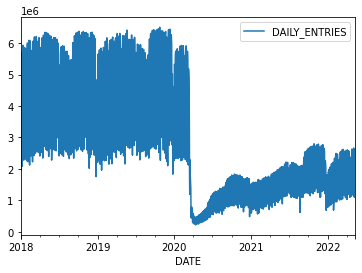

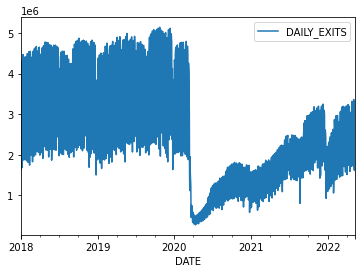

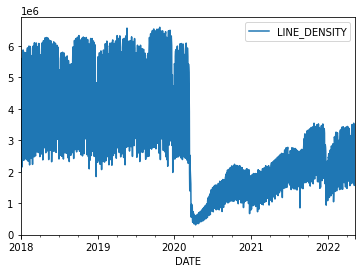

In [7]:
temp = (df#[(df.DATE.dt.dayofweek > 5)&(df.LINE_DENSITY < 100000000)]
    .groupby('DATE').sum())
temp.reset_index(inplace=True)
# temp = df.groupby('DATE').sum()
temp.plot.line('DATE','DAILY_ENTRIES')
temp.plot.line('DATE','DAILY_EXITS')
temp.plot.line('DATE','LINE_DENSITY')

In [50]:
df = load_pickle('./mta_data_cleaned/mta_data_full')
df.reset_index(inplace=True)
df_covid = pd.read_csv('./covid_data_raw/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv')

# Retrieved list of columns from ~ df_covid.columns
df_covid = df_covid[['DATE_OF_INTEREST', 'CASE_COUNT', 'probable_case_count',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'DEATH_COUNT_PROBABLE',
       'CASE_COUNT_7DAY_AVG', 'all_case_count_7day_avg', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG', 'all_death_count_7day_avg']]

df_covid['DATE'] = pd.to_datetime(df_covid.DATE_OF_INTEREST)

df = pd.merge(df.groupby('DATE').sum(),
              df_covid, on=['DATE', 'DATE'])

pickle_file(df, './data_merged/mta_cases_daily')

df.head()


,DATE,DAILY_ENTRIES,DAILY_EXITS,LINE_DENSITY,DATE_OF_INTEREST,CASE_COUNT,probable_case_count,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,all_case_count_7day_avg,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,all_death_count_7day_avg
0,2020-02-29,2.920760e+06,2.535655e+06,3.082079e+06,02/29/2020,1,0,1,0,0,0,0,0,0,0
1,2020-03-01,2.234216e+06,1.953210e+06,2.372123e+06,03/01/2020,0,0,1,0,0,0,0,0,0,0
2,2020-03-02,5.571754e+06,4.513982e+06,5.767868e+06,03/02/2020,0,0,2,0,0,0,0,0,0,0
3,2020-03-03,5.737157e+06,4.658798e+06,5.936575e+06,03/03/2020,1,0,7,0,0,0,0,0,0,0
4,2020-03-04,5.735428e+06,4.670542e+06,5.934603e+06,03/04/2020,5,0,2,0,0,0,0,0,0,0


<AxesSubplot:xlabel='DATE'>

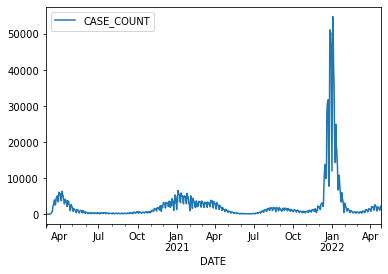

In [43]:
df.plot.line('DATE','CASE_COUNT')

In [26]:
import matplotlib.pyplot as plt

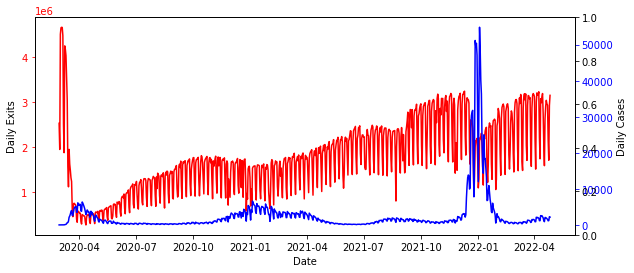

In [44]:

# plt.figure(figsize=(4,12))

fig, ax = plt.subplots(figsize=(12,4))


# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
# axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# And finally we get to plot things...
colors = ('Red', 'Blue')
i=0
# df = df[df.DAILY_ENTRIES<1000000]
for ax, color in zip(axes, colors):
    if i ==0 :
        ax.plot(df.DATE,df.DAILY_EXITS, color=color)
        ax.set_ylabel('Daily Exits')
    else: 
        ax.plot(df.DATE,df.CASE_COUNT, color=color)
        ax.set_ylabel('Daily Cases')
    # ax.set_ylabel('%s Thing' % color, color=color)
    ax.tick_params(axis='y', colors=color)
    i+= 1
axes[0].set_xlabel('Date')


plt.show()

In [46]:
print(f'Correlation between Subway Entries and Covid Cases:\t{df.DAILY_ENTRIES.corr(df.CASE_COUNT)}')
print(f'Correlation between Subway Exits and Covid Cases:\t{df.DAILY_EXITS.corr(df.CASE_COUNT)}')
print(f'Correlation between Line Density and Covid Cases:\t{df.LINE_DENSITY.corr(df.CASE_COUNT)}')

Correlation between Subway Entries and Covid Cases:	0.01944282793550411
Correlation between Subway Exits and Covid Cases:	0.052264121865775406
Correlation between Line Density and Covid Cases:	0.03498084194455494


In [51]:
for x in range(-14,0):
    print(f'Correlation between Line Density and Covid Cases {-x} days later:\t{df.DAILY_EXITS.shift(x).corr(df.CASE_COUNT.iloc[:x])}')

Correlation between Line Density and Covid Cases 14 days later:	0.06608657500296604
Correlation between Line Density and Covid Cases 13 days later:	0.008204611894177647
Correlation between Line Density and Covid Cases 12 days later:	-0.025630340572804795
Correlation between Line Density and Covid Cases 11 days later:	-0.0278848676000054
Correlation between Line Density and Covid Cases 10 days later:	-0.019304403772555462
Correlation between Line Density and Covid Cases 9 days later:	0.0033463835805082223
Correlation between Line Density and Covid Cases 8 days later:	0.03995052130955091
Correlation between Line Density and Covid Cases 7 days later:	0.04357365318804842
Correlation between Line Density and Covid Cases 6 days later:	-0.0068747732729571255
Correlation between Line Density and Covid Cases 5 days later:	-0.04435132222094351
Correlation between Line Density and Covid Cases 4 days later:	-0.0468776928804954
Correlation between Line Density and Covid Cases 3 days later:	-0.03664

In [52]:
for x in range(1,14):
    print(f'Correlation between Line Density and Covid Cases {x} days before:\t{df.DAILY_EXITS.shift(x).corr(df.CASE_COUNT.iloc[x:])}')

Correlation between Line Density and Covid Cases 1 days before:	0.0038720833810082012
Correlation between Line Density and Covid Cases 2 days before:	-0.030092380281745268
Correlation between Line Density and Covid Cases 3 days before:	-0.026211401354741887
Correlation between Line Density and Covid Cases 4 days before:	-0.006064872744751035
Correlation between Line Density and Covid Cases 5 days before:	0.029931513118827933
Correlation between Line Density and Covid Cases 6 days before:	0.08139067171608522
Correlation between Line Density and Covid Cases 7 days before:	0.10476390628926088
Correlation between Line Density and Covid Cases 8 days before:	0.06574418473562699
Correlation between Line Density and Covid Cases 9 days before:	0.039412554097323034
Correlation between Line Density and Covid Cases 10 days before:	0.05134674120679574
Correlation between Line Density and Covid Cases 11 days before:	0.07750668510764289
Correlation between Line Density and Covid Cases 12 days before: